## Error Analysis - Naive Bayes Model 1 (All Features)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from collections import  Counter
stopwords = nltk.corpus.stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [21]:
TP = pd.read_csv("TP.csv")
TP0 = pd.read_csv("TP0.csv")
TP1 = pd.read_csv("TP1.csv")
TP2 = pd.read_csv("TP2.csv")
E = pd.read_csv("E.csv")
E01 = pd.read_csv("E01.csv")
E02 = pd.read_csv("E02.csv")
E10 = pd.read_csv("E10.csv")
E12 = pd.read_csv("E12.csv")
E20 = pd.read_csv("E20.csv")
E21 = pd.read_csv("E21.csv")

In [22]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

In [23]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

In [7]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

In [24]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

## TP Evaluation

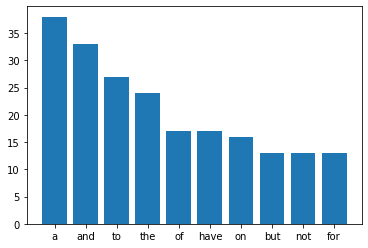

In [60]:
plot_top_stopwords_barchart(TP2["clean"])

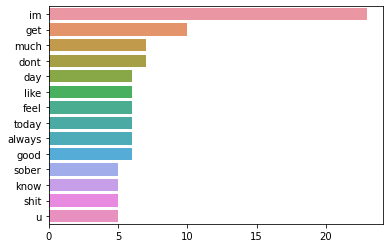

In [59]:
plot_top_non_stopwords_barchart(TP2["clean"])

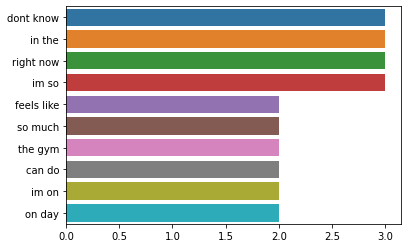

In [61]:
plot_top_ngrams_barchart(TP2["clean"],2)

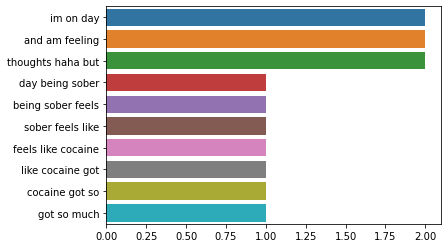

In [62]:
plot_top_ngrams_barchart(TP2["clean"],3)

## E

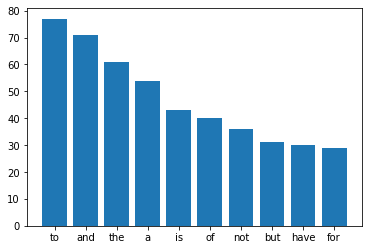

In [63]:
plot_top_stopwords_barchart(E["clean"])

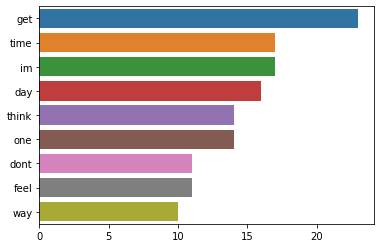

In [36]:
plot_top_non_stopwords_barchart(E["clean"])

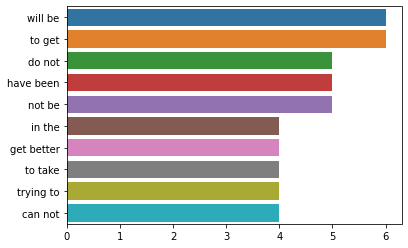

In [37]:
plot_top_ngrams_barchart(E["clean"],2)

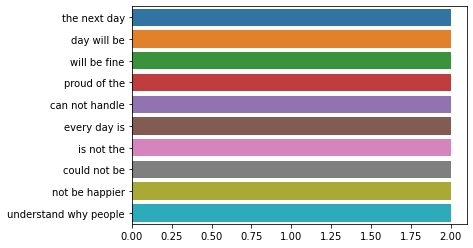

In [38]:
plot_top_ngrams_barchart(E["clean"],3)

## Errors in Future (0) Class

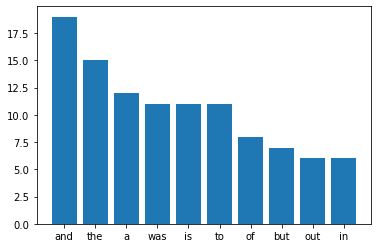

In [88]:
plot_top_stopwords_barchart(E21["clean"])

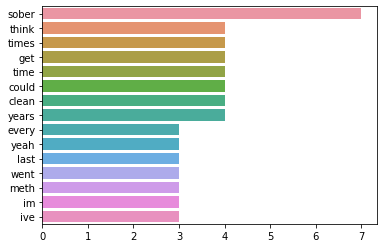

In [89]:
plot_top_non_stopwords_barchart(E21["clean"])

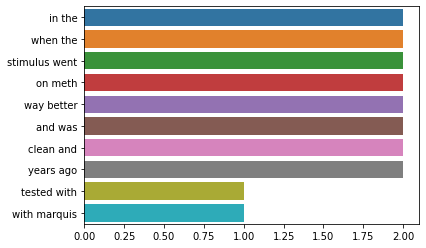

In [90]:
plot_top_ngrams_barchart(E21["clean"],2)

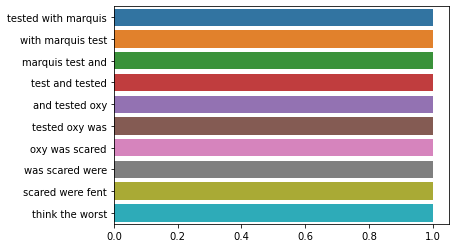

In [91]:
plot_top_ngrams_barchart(E21["clean"],3)

## FP

### TP vs FP

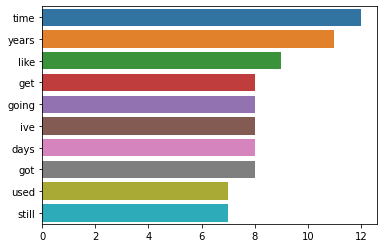

In [18]:
plot_top_non_stopwords_barchart(TP["clean"])

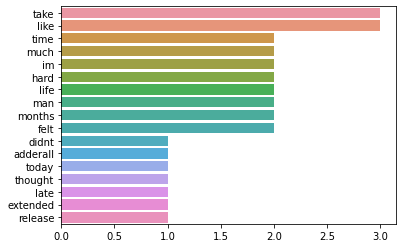

In [19]:
plot_top_non_stopwords_barchart(FP["clean"])